In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')


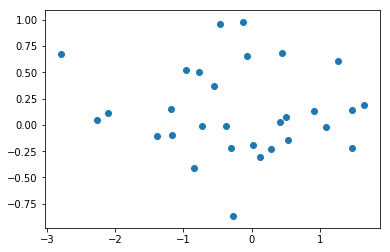

In [2]:
def lin(a,b,x): return a*x+b

import random
# get some random parameters for a line. And we will try to approximate these using gradient descent.

a=random.random()
b=random.random()

n=30
import numpy as np
x = np.random.normal(0,1,n) 
y = lin(a,b,x)+ np.random.normal(0,0.5,n)

plt.scatter(x,y)

In [3]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

# randomly choosing parameters. We will make it better using gradient descent.
a_guess=random.random()
b_guess=random.random()
avg_loss(y, a_guess, b_guess, x)

0.9154772762695111

In [4]:
lr=0.01
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()
    
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=80)
ani

In [5]:
avg_loss(y, a_guess, b_guess, x)

0.41194489506740434

In [ ]:
# Notice the improvement in loss!